In [1]:
import numpy as np
import torch
import torchvision
from voc_helpers.ptvoc import VOCClassification
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.backends.backend_pdf import PdfPages
import csv

categories = ['aeroplane', 'bicycle', 'bird', 'boat',
              'bottle', 'bus', 'car', 'cat', 'chair',
              'cow', 'diningtable', 'dog', 'horse',
              'motorbike', 'person', 'pottedplant',
              'sheep', 'sofa', 'train', 'tvmonitor']

In [2]:
# Load images
yr = '2012'
transform = torchvision.transforms.Resize((256,256))
valset = VOCClassification(root='./data', image_set='val', year=yr,
                           download=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=4, shuffle=False)

Using downloaded and verified file: ./data/VOCtrainval_11-May-2012.tar
[dataset] read ./data/files/VOC2012/classification_val.csv


In [3]:
# Resnet50 Predictions
net_labels = np.loadtxt("resnet50_labels_7.csv", delimiter=",")

In [4]:
# Random Patches Predictions
# patch_labels = np.loadtxt("patch6_4k_labels.csv", delimiter=",")
patch_labels = np.loadtxt("patch_labels.csv", delimiter=',')

In [5]:
img_labels = []
with open('data/files/VOC2012/classification_val.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            img_labels.append(row[0])
        line_count += 1

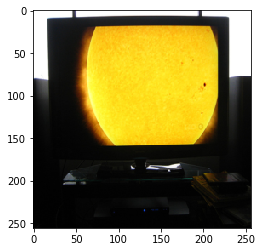

Index: 0 2008_000002
True Label: tvmonitor
Resnet Label: tvmonitor
Patch Label:   dog pottedplant
True


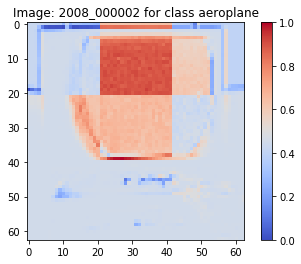

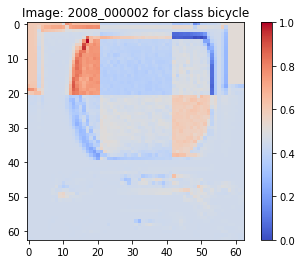

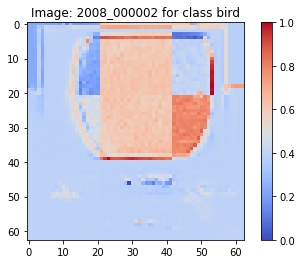

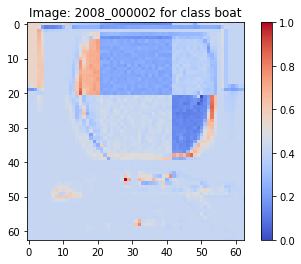

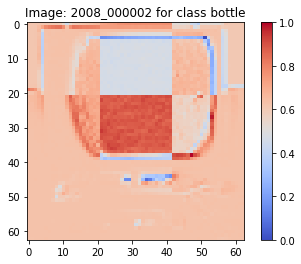

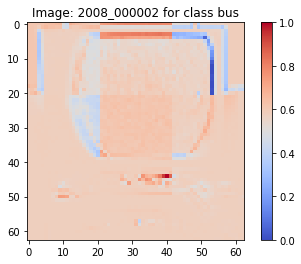

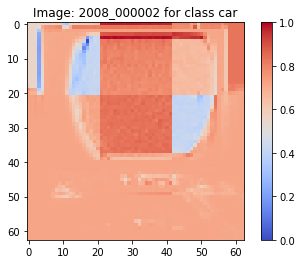

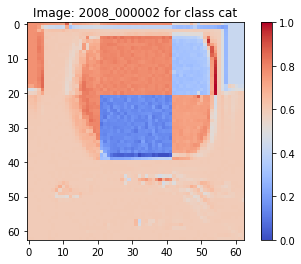

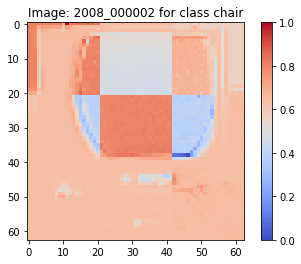

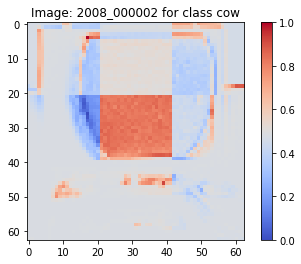

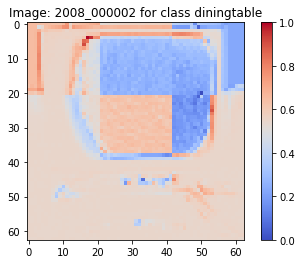

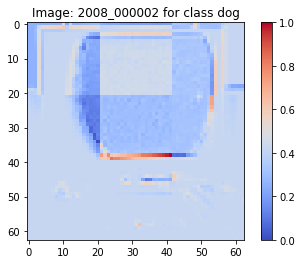

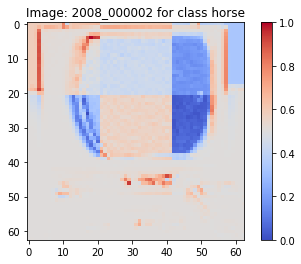

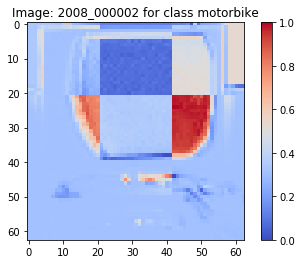

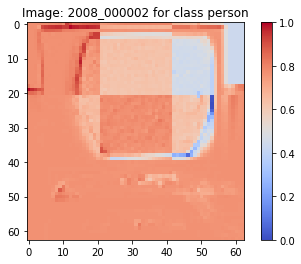

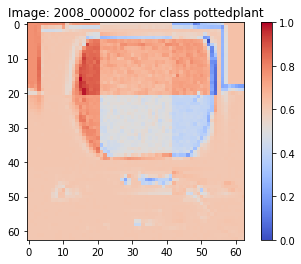

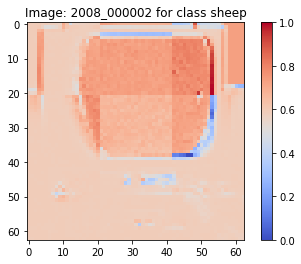

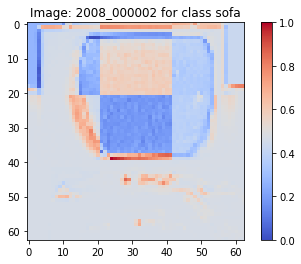

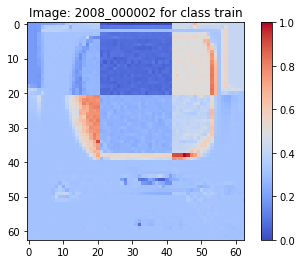

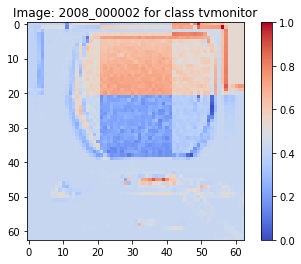

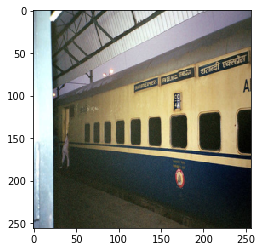

Index: 1 2008_000003
True Label: person train
Resnet Label: person train
Patch Label: person
True


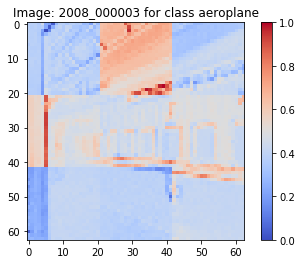

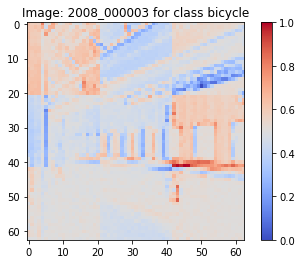

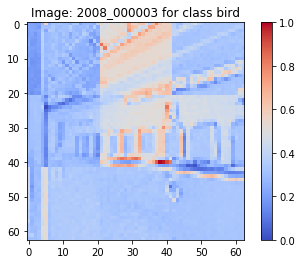

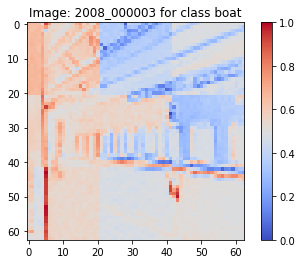

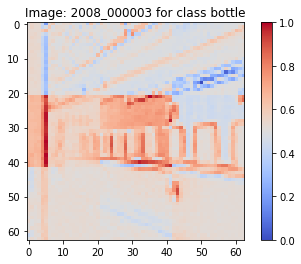

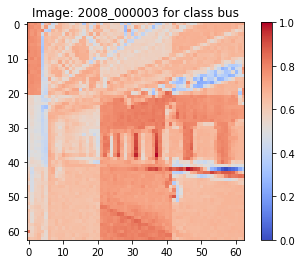

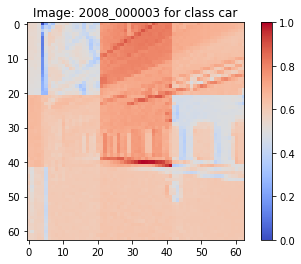

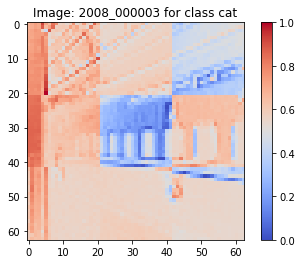

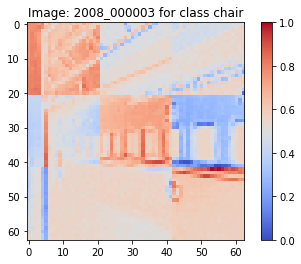

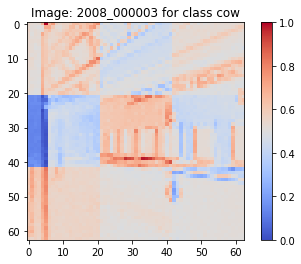

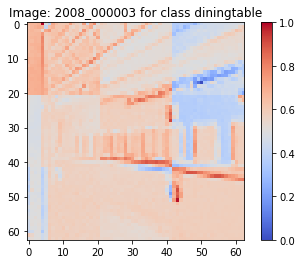

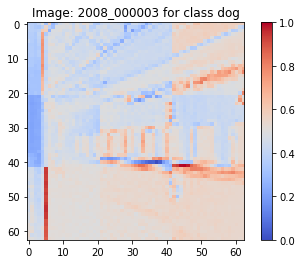

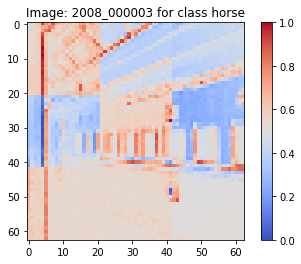

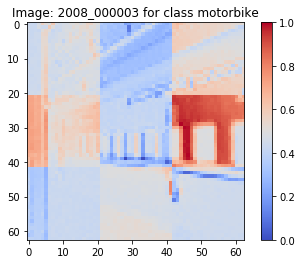

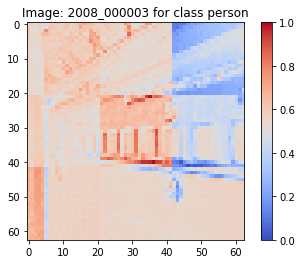

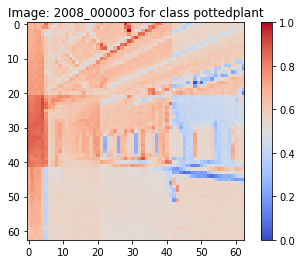

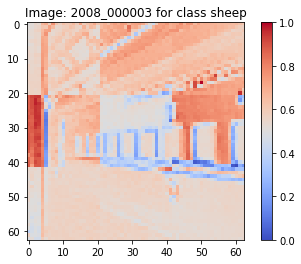

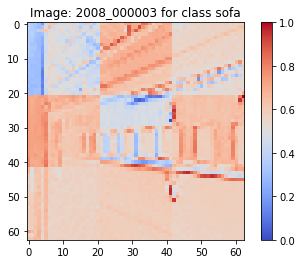

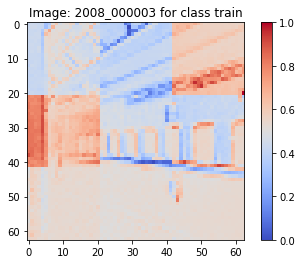

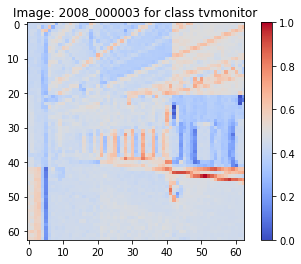

In [37]:
images = valset.data
true_labels = np.array(valset.labels)
indices = range(0, 2)
for i in indices:
    plt.imshow(images[i])
    plt.show()
    print("Index: " + str(i) + " " + img_labels[i])
    print("True Label: " + ' '.join('%5s' % j for j in [categories[int(k)] for k in np.argwhere(true_labels[i] == 1)]))
    print("Resnet Label: " + ' '.join('%5s' % j for j in [categories[int(k)] for k in np.argwhere(net_labels[i] == 1)]))
    print("Patch Label: " + ' '.join('%5s' % j for j in [categories[int(k)] for k in np.argwhere(patch_labels[i] == 1)]))
    print("True")
    for k in range(20):
        temp = np.load('visual/' + img_labels[i] + "_" + str(k) + ".npy")
        fig, ax = plt.subplots()
        cax = ax.imshow(np.clip(temp, 0, 1), interpolation='nearest', cmap=cm.coolwarm)
        ax.set_title('Image: ' + img_labels[i] + ' for class ' + categories[int(k)])
        fig.colorbar(cax)
        plt.show()
    '''
    for k in np.argwhere(true_labels[i] == 1):
        print(categories[int(k)])
        print(k)
        print('visual/' + img_labels[i] + "_" + str(k[0]) + ".npy")
        emp = np.load('visual/' + img_labels[i] + "_" + str(k[0]) + ".npy")
        plt.imshow(np.clip(temp, 0, 1))
        plt.show()
    print("Patch")
    for k in np.argwhere(patch_labels[i] == 1):
        print(categories[int(k)])
        temp = np.load('visual/' + img_labels[i] + "_" + str(k[0]) + ".npy")
        plt.imshow(np.clip(temp, 0, 1))
        plt.show()
    '''

KeyboardInterrupt: 

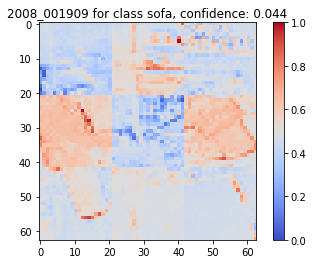

In [38]:
# Generate PDFs
patch_labels = np.loadtxt("patch_visualize_labels.csv", delimiter=",")
thresh = np.loadtxt("patch_visualize_prethresh.csv", delimiter=",")
make_pdf = True
if make_pdf:
    indices = range(0, len(img_labels))
    for i in indices:
        with PdfPages('pdf/' + img_labels[i] + '.pdf') as pp:
            plt.clf()
            txt = "Index: " + str(i) + " " + img_labels[i]
            plt.text(0.05,0.95,txt, transform=fig.transFigure, size=16)
            txt = "True Label: " + ' '.join('%5s' % j for j in [categories[int(k)] for k in np.argwhere(true_labels[i] == 1)])
            plt.text(0.05,0.65,txt, transform=fig.transFigure, size=16)
            txt = "Resnet Label: " + ' '.join('%5s' % j for j in [categories[int(k)] for k in np.argwhere(net_labels[i] == 1)])
            plt.text(0.05,0.35,txt, transform=fig.transFigure, size=16)
            txt = "Patch Label: " + ' '.join('%5s' % j for j in [categories[int(k)] for k in np.argwhere(patch_labels[i] == 1)])
            plt.text(0.05,0.05,txt, transform=fig.transFigure, size=16)
            pp.savefig()
            plt.close()
            plt.imshow(images[i])
            pp.savefig()
            plt.close()
            for k in range(20):
                temp = np.load('visual/' + img_labels[i] + "_" + str(k) + ".npy")
                fig, ax = plt.subplots()
                cax = ax.imshow(np.clip(temp, 0, 1), interpolation='nearest', cmap=cm.coolwarm)
                plt.title(img_labels[i] + ' for class ' + categories[int(k)] + ', confidence: ' + str(round(thresh[i, k], 4)))
                fig.colorbar(cax)
                pp.savefig()
                plt.close()

In [40]:
# Generate CSV if needed
generate = True
if generate:
    with open('VOC2012_comparison_val.csv', mode='w') as data_file:
        data_writer = csv.writer(data_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        data_writer.writerow(['Image Index', 'Truth', 'Resnet Preds', "Patch Preds", "Link", "PDF"])
        for i in range(len(images)):
            image_index = img_labels[i]
            truth = ' '.join('%5s' % j for j in [categories[int(k)] for k in np.argwhere(true_labels[i] == 1)])
            resnet_pred = ' '.join('%5s' % j for j in [categories[int(k)] for k in np.argwhere(net_labels[i] == 1)])
            patch_pred = ' '.join('%5s' % j for j in [categories[int(k)] for k in np.argwhere(patch_labels[i] == 1)])
            link = "c71.millennium.berkeley.edu:8000/" + str(image_index) + ".jpg"
            pdf = "http://c71.millennium.berkeley.edu:8992/pdf/" + str(image_index) + ".pdf"
            data_writer.writerow([image_index, truth, resnet_pred, patch_pred, link, pdf])